# Machine Learning Prediction

Perform exploratory Data Analysis and determine the Training labels
- create a column for the class
- Standardise the data
- Split into train/test data
- Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
- Find the method performs best using test data

## Import Libraries and auxiliary Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing allow us to standardise data
from sklearn import preprocessing
#Allows us to split our data into training and testing pair
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K nearest neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix

In [2]:
def plot_confusion_matrix(y, y_predict):
    """
    This function plots the confusion matrix by using a heat map
    """
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax); #annot=True to annotate the cells
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'land'])
    plt.show()

## Load the dataframe

In [3]:
#path1 = 'dataset_part_2.csv'
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(url1)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
#path2 = 'dataset_part_3.csv'
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(url2)
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### Create Features

Create a numpy array from the column `Class` in `data` by applying the method `to_numpy()` then assign it to variable `Y`, making sure that the output is a Pandas series (i.e. df['Column'])

In [5]:
Y = data['Class'].to_numpy()

Standardise the data in `X` then reassign it to the variable `X` using the transform provided below.

In [6]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

### Train Test Split

We split the data into training and testing data using the function `train_test_split`. The training data is divided into validation data, a second set used for training data, then the models are trained and hyperparameters are selected using the function `GridSearchCV`.

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

We can see we only have 18 test samples.

In [8]:
Y_test.shape

(18,)

### Logistic Regression

Create a logistic regression object then create a GridSearchCV object `logreg_cv` with cv=10. Fit the object to find the best parameters from the dictionary `parameters`.

In [9]:
parameters = {
    'C':[0.01, 0.1, 1],
    'penalty':['l2'], #L1 lasso L2 ridge
    'solver':['lbfgs'] 
}

In [10]:
lr = LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [11]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


### Logistic Regression evaluation

Calculate the accuracy on the test data using the method `score`.

In [12]:
acc = logreg_cv.score(X_test, Y_test)
print(f"Accuracy of Logistic Regression with C=0.01, penalty=l2, solver=lbfgs is {round(acc,2)}.")

Accuracy of Logistic Regression with C=0.01, penalty=l2, solver=lbfgs is 0.83.


Let's look at the confusion matrix:

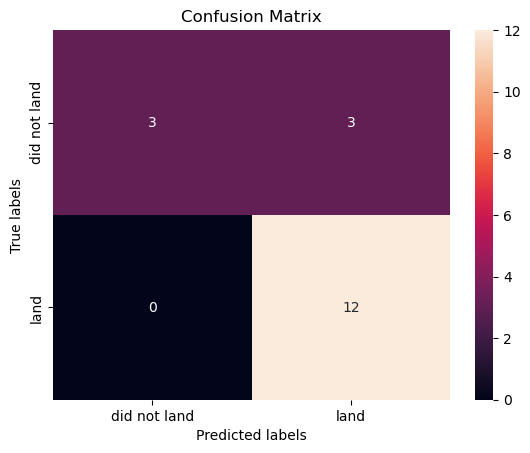

In [13]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that the logistic regression can distinguish between the different classes. We see that the problem is false positives.

Overview:

True Positive - 12 (True label is landed, Predicted labels is also landed)

False Positives - 3 (True label is not landed, Predicted labels is landed)

### Support Vector Machine (SVM

Create a support vector machine object then create a `GridSearchCV` object `svm_cv` with cv=10. Fit the object to find the best parameters from the dictionary `parameters`.

In [14]:
parameters = {
    'kernel':('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm = SVC()

In [15]:
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring='accuracy', n_jobs=-1)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [16]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


### SVM Evaluation

Calculate the accuracy of the test data using the method `score`.

In [17]:
acc = svm_cv.score(X_test, Y_test)
print(f"Accuracy of SVM with {svm_cv.best_params_} is {round(acc,2)}.")

Accuracy of SVM with {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'} is 0.83.


We can plot the confusion matrix.

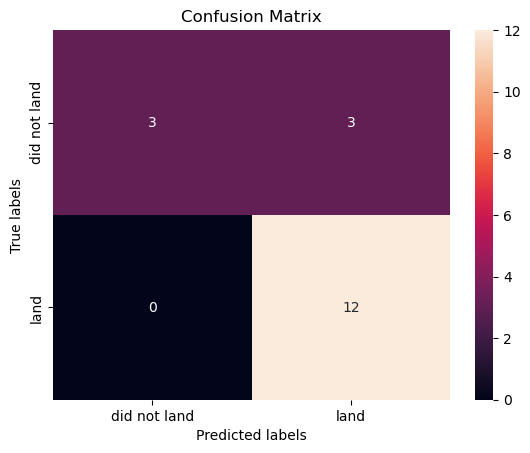

In [18]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that the SVM can distinguish between the different classes. We see that it is similar to Logistic Regression with the same number of false positives.

Overview:

True Positive - 12 (True label is landed, Predicted labels is also landed)

False Positives - 3 (True label is not landed, Predicted labels is landed)

### Decision Tree Classifier

Create a decision tree classifier object then create a `GridSearchCV` object `tree_cv` with cv=10. Fit the object to find the best parameters from the dictionary `parameters`.

In [19]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth':[2*n for n in range(1,10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf':[1,2,4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier()

In [20]:
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, n_jobs=-1)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [21]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.875


### Decision Tree Classifier Evaluation

Calculate the accuracy of the tree_cv on the test data using the method `score`.

In [22]:
acc = tree_cv.score(X_test, Y_test)
print(f"Accuracy of Decision Tree Classifer with {tree_cv.best_params_} is {round(acc,2)}.")

Accuracy of Decision Tree Classifer with {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'} is 0.83.


We can plot the confusion matrix.

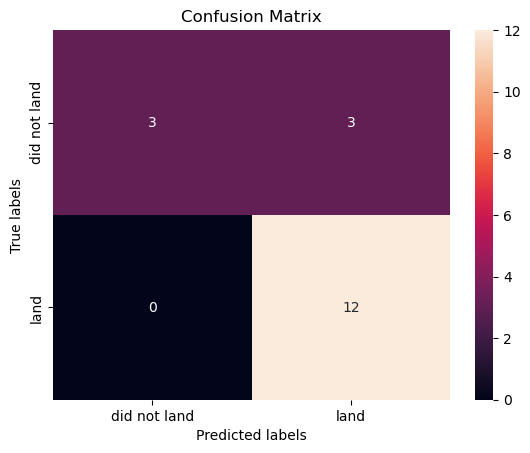

In [23]:
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that the Decision Tree can distinguish between the different classes. We see that there is 1 less false positives, but also 1 more false negatives.

Overview:

True Positive - 11 (True label is landed, Predicted labels is also landed)

False Positives - 2 (True label is not landed, Predicted labels is landed)

### K-Nearest Neighbors

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [24]:
parameters = {
    'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}
KNN = KNeighborsClassifier()

In [25]:
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10, n_jobs=-1)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [26]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


### KNN Evaluation

Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

In [27]:
acc = knn_cv.score(X_test, Y_test)
print(f"Accuracy of KNN with {knn_cv.best_params_} is {round(acc,2)}.")

Accuracy of KNN with {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1} is 0.83.


We can plot the confusion matrix.

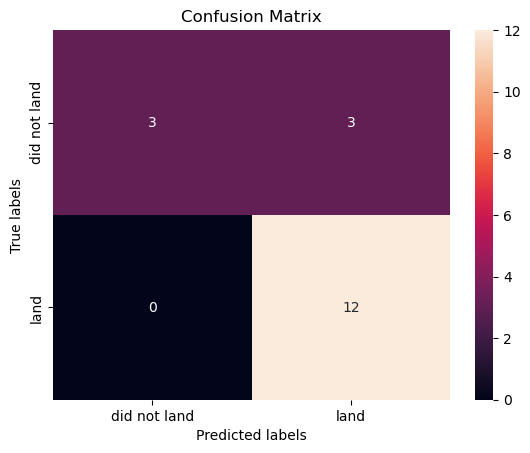

In [28]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

### Overall Evaluation of all modesl
- Logistic Regression
- SVM
- Decision Tree Classifier
- KNN

All of them perform similarly, able to fully predict True positives, but will turn up with false positives and false negatives.